<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/06/MLP/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron e RNA

Neste notebook, implementaremos o Perceptron, um modelo simples de neurônio artificial criado em 1958 por Frank Rosenblatt. Ele é capaz de classificar exemplos em duas classes e usa pesos e bias para calcular a saída final. O ajuste dos pesos e bias é dado com base nos erros de classificação em cada iteração.

O Perceptron é base para desenvolvimento de modelos mais sofisticados como o Multilayer Perceptron (MLP) e o Convolutional Neural Network (CNN). Portanto, o estudo do Perceptron é fundamental para entender as redes neurais em geral, bem como as possibilidades e limitações que elas apresentam.

É importante ressaltar que este notebook é complementar aos slides de sala de aula, os quais apresentam a teoria detalhada do Perceptron.

Também abordaremos a implementação de MLPs ao final deste notebook, analisando criticamente seu desempenho em diferentes cenários.

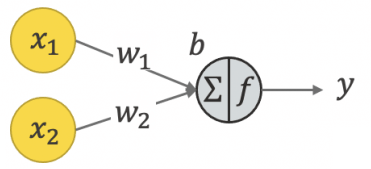

In [1]:
import numpy as np

def activation(x):
  return np.where(x >= 0, 1, 0)

def predict(X,weights,bias):
      z = np.dot(X, weights) + bias
      return activation(z)

def fit(X, y, learning_rate=0.001, epochs=100):
      n_features = X.shape[1]

      # Inicialização dos pesos
      weights = weights = np.random.rand(n_features)
      bias = 0

      # Iteração por epocas
      for epoch in range(epochs):
          # iteração entre as amostras
          for i in range(len(X)):
              z = np.dot(X, weights) + bias # Produto escalar e bias
              y_pred = activation(z) #Função de ativação
              loss = (y[i] - y_pred[i]) #calculo da perda

              #Atualização dos pesos com base no erro
              weights = weights + learning_rate * loss * X[i]
              bias = bias + learning_rate * loss

      #Calculo de performance da epoca
      y_pred = predict(X,weights,bias)
      acc = 1 - np.sum(np.abs(y_pred-y))/len(X)
      print(f'acc after epcoch {epoch}: {acc}')
      return weights, bias

Testando o modelo

#Rede Neural - MLP

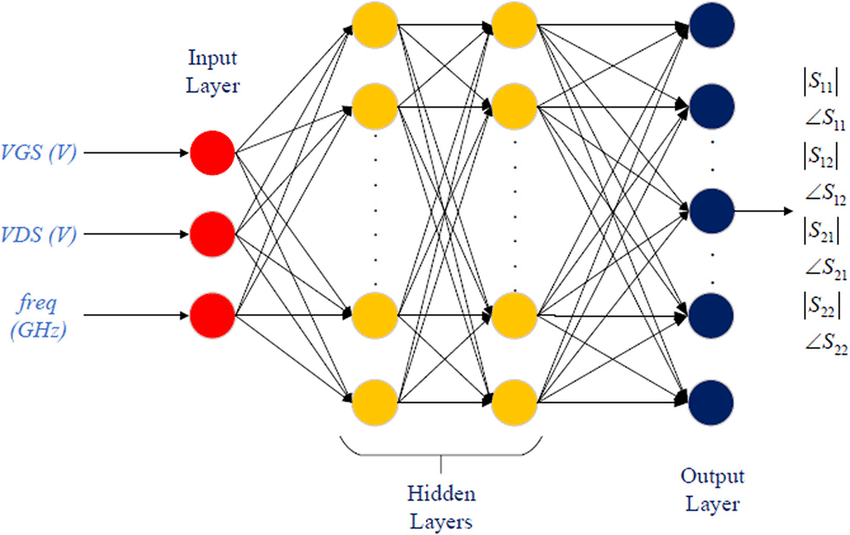

Vamos ver uma implementação dessa rede, utilizando scikit learn!

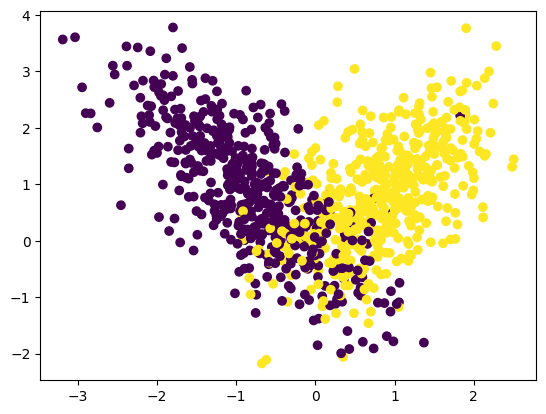

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,
                           n_informative=2, n_redundant=0, class_sep=0.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
# Fração treino-teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.85      0.85      0.85        95

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



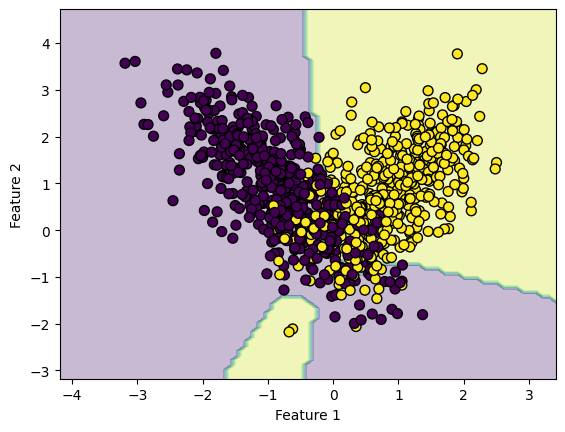

In [4]:
# Criação do modelo MLP com 2 layers
# hidden_layer_sizes=(100, 100) -> cria o modelo MLP com duas camadas de 100 perceptrons cada
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=2000, random_state=42)

# Treinamento do modelo
mlp1.fit(X_train, y_train)

# Teste do modelo
pred1 = mlp1.predict(X_test)

# Resultados
print(classification_report(y_test, pred1))

# Fronteiras de decisão
# Cria o meshgrid
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
                     np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))


# Obtem as previsões da MLP para cada ponto do meshgrid
Z = mlp1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualiza as fronteiras de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.88      0.82      0.85        95

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



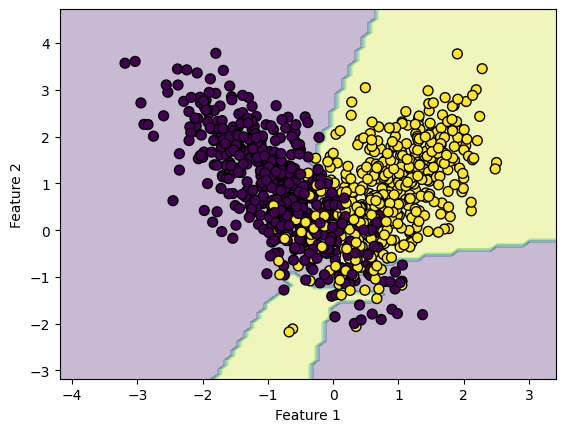

In [5]:
# Criação do modelo MLP com 3 layers
# hidden_layer_sizes=(100, 100, 100) -> cria o modelo MLP com três camadas de 100 perceptrons cada
mlp2 = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300), learning_rate_init=0.001, max_iter=1000, random_state=42)

# Treinamento do modelo
mlp2.fit(X_train, y_train)

# Teste do modelo
pred2 = mlp2.predict(X_test)

# Resultados
print(classification_report(y_test, pred2))

# Fronteiras de decisão
# Cria o meshgrid
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
                     np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))


# Obtem as previsões da MLP para cada ponto do meshgrid
Z = mlp2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualiza as fronteiras de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Avaliando o número de neurônios e camadas

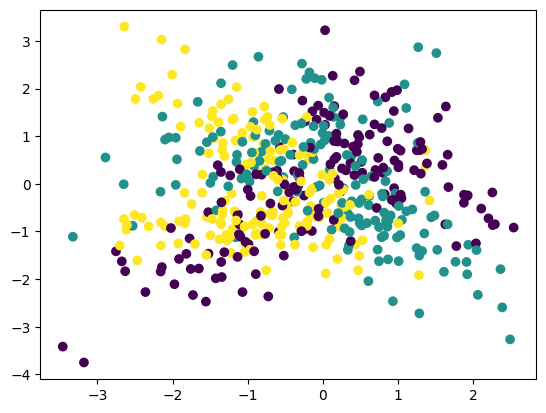

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.70      0.75      0.72        28
           2       0.88      0.88      0.88        25

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.78      0.78      0.78        80

######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7625
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.70      0.68      0.69        28
           2       0.81      0.88      0.85        25

    accuracy                           0.76        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.76      0.76      0.76        80

######################################
0.8375
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.81      0.75      0.78        28
           2       0.89      0.96      0.92        25

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

######################################
0.8125
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.75      0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.75
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.83      0.54      0.65        28
           2       0.71      0.88      0.79        25

    accuracy                           0.75        80
   macro avg       0.76      0.76      0.74        80
weighted avg       0.76      0.75      0.74        80

######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.74      0.61      0.67        28
           2       0.79      0.92      0.85        25

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.77      0.78      0.77        80

######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.775
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.70      0.68      0.69        28
           2       0.85      0.92      0.88        25

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.78        80
weighted avg       0.77      0.78      0.77        80

######################################
0.8375
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.81      0.75      0.78        28
           2       0.89      0.96      0.92        25

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

######################################


In [6]:
X, y = make_classification(n_samples=500, n_features=3, n_classes=3, n_informative=3, n_redundant=0, class_sep=0.85, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#70-30 (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Sobre o treino, selecion 30% para val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Variando camadas e neuronios
clfs = []
clfs.append(MLPClassifier(hidden_layer_sizes=(10,10), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(10,10,10), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100,100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(300,300,300,300), learning_rate_init=0.001, max_iter=2000, random_state=42))

#Variando Iterações
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=100, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=200, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=500, random_state=42))
clfs.append(MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.001, max_iter=2000, random_state=42))

for i,model in enumerate(clfs):

  model.fit(X_train, y_train)
  preds = model.predict(X_val)
  print(accuracy_score(y_val,preds))
  print(classification_report(y_val,preds))
  print("######################################")

#Comparação com vários classificadores

Realize vários experimentos, considerando número de amostras, classes e features.

Analise o tempo, acuracia, etc.

Verifique qual classificador possui a melhor acurácia para cada caso.